# Seção 2: Data Wrangling

Para preparar nossos dados para serem analisados, utilizar data wrangling. Nessa seção, vamos aprender como limpar e reformatar dados(renomear colunas e arrumar incompatibilidades nos tipos de dados, por exemplo), a reestruturar/reformatar esses dados e os enriquecer(discretizando colunas, calculando agregações, combinando fontes de dados, etc).

## Limpeza de dados

Nessa seção, vamos ver: como criar, renomear e descartar colunas; conversão de tipos e ordenação &ndash; técnicas que facilitam a nossa análise. Vamos utilizar o dataset 2019 Yellow Taxi Trip Data disponibilizado pela NYC Open Data.

In [ ]:
import pandas as pd

# Carrego o dataset a partir do GitHub
url = 'https://raw.githubusercontent.com/stefmolin/pandas-workshop/main/data/2019_Yellow_Taxi_Trip_Data.csv'

taxis = pd.read_csv(url)
taxis.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


*Fonte: [NYC Open Data](https://data.cityofnewyork.us/Transportation/2019-Yellow-Taxi-Trip-Data/2upf-qytp) coletado via [SODA](https://dev.socrata.com/foundry/data.cityofnewyork.us/2upf-qytp).*

### Descartando colunas
Vamos começar descartando as colunas de ID e a `store_and_fwd_flag`, as quais não vamos usar.

In [ ]:
mask = taxis.columns.str.contains('id$|store_and_fwd_flag', regex=True)
columns_to_drop = taxis.columns[mask]
columns_to_drop

Index(['vendorid', 'ratecodeid', 'store_and_fwd_flag', 'pulocationid',
       'dolocationid'],
      dtype='object')

In [ ]:
taxis = taxis.drop(columns=columns_to_drop)
taxis.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


*Dica: Outra forma de fazer isso é selecionar as colunas que queremos manter: `taxis.loc[:,~mask]`.*

### Renomeando colunas

Agora, vamos renomear as colunas de datetime (data e hora):

In [ ]:
taxis.rename(
    columns={
        'tpep_pickup_datetime': 'pickup', 
        'tpep_dropoff_datetime': 'dropoff'
    },
    inplace=True
)
taxis.columns

Index(['pickup', 'dropoff', 'passenger_count', 'trip_distance', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge'],
      dtype='object')

**Importante**: Essa operação foi executada in-place &ndash; tome cuidade com operações in-place.

### Conversão de tipo

Nota algo estranho com esses tipos dos dados?

In [ ]:
taxis.dtypes

pickup                    object
dropoff                   object
passenger_count            int64
trip_distance            float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

Tanto `pickup` quanto `dropoff` deveriam ser armazenados como datetimes. Vamos arrumar isso:

In [ ]:
taxis.loc[:, ['pickup', 'dropoff']] = \
    taxis.loc[:, ['pickup', 'dropoff']].apply(pd.to_datetime)
taxis.dtypes

pickup                   datetime64[ns]
dropoff                  datetime64[ns]
passenger_count                   int64
trip_distance                   float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

*Dica: Existem outras formas de realizar a conversão de tipo. Para valores numéricos, podemos utilizar a função `pd.to_numeric()`, e também veremos mais tarde o método `astype()`, que é mais genérico.*

### Criando novas colunas

Vamos calcular os seguintes valores para cada linha:

1. tempo decorrido da viagem (elapsed_time)
2. a porcentagem de gorjeta (tip_pct)
3. total de taxas, pedágios e honorários (fees)
4. a velocidade média do taxi (avg_speed)

Criamos uma coluna para cada um desses valores e para o custo antes da gorjeta (cost_before_tip):

In [ ]:
taxis = taxis.assign(
    elapsed_time=lambda x: x.dropoff - x.pickup, # 1
    cost_before_tip=lambda x: x.total_amount - x.tip_amount,
    tip_pct=lambda x: x.tip_amount / x.cost_before_tip, # 2
    fees=lambda x: x.cost_before_tip - x.fare_amount, # 3
    avg_speed=lambda x: x.trip_distance.div(
        x.elapsed_time.dt.total_seconds() / 60 / 60
    ) # 4
)

*Dica: Não conhece funções `lambda`? Essas pequenas e anônimas funções podem receber múltiplos argumentos, porém só podem conter uma expressão (o valor de retorno). Você verá essas funções em vários códigos que usam pandas. Leia mais sobre elas [aqui](https://realpython.com/python-lambda/).*

As novas colunas são adicionadas na direita:

In [ ]:
taxis.head(2)

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
0,2019-10-23 16:39:42,2019-10-23 17:14:10,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.9,2.5,0 days 00:34:28,39.92,0.1999,10.42,13.804642
1,2019-10-23 16:32:08,2019-10-23 16:45:26,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.3,0.0,0 days 00:13:18,12.30,0.0000,1.80,9.022556


Algumas coisas a serem observadas:
- Utilizamos funções `lambda` para 1) evitar digitar `taxis` várias vezes e 2) para conseguir acessar as colunas `cost_before_tip` e `elapsed_time` no mesmo método no qual elas são criadas.
- Para criar uma única coluna, também podemos utilizar `df['nova_coluna'] = <valores>`.

### Ordenando por valores

Podemos utilizar o método `sort_values()` para ordenar com base em qualquer número de colunas:

In [ ]:
taxis.sort_values(['passenger_count', 'pickup'], ascending=[False, True]).head()

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
5997,2019-10-23 15:55:19,2019-10-23 16:08:25,6,1.58,2,10.0,1.0,0.5,0.0,0.0,0.3,14.3,2.5,0 days 00:13:06,14.3,0.000000,4.3,7.236641
443,2019-10-23 15:56:59,2019-10-23 16:04:33,6,1.46,2,7.5,1.0,0.5,0.0,0.0,0.3,11.8,2.5,0 days 00:07:34,11.8,0.000000,4.3,11.577093
8722,2019-10-23 15:57:33,2019-10-23 16:03:34,6,0.62,1,5.5,1.0,0.5,0.7,0.0,0.3,10.5,2.5,0 days 00:06:01,9.8,0.071429,4.3,6.182825
4198,2019-10-23 15:57:38,2019-10-23 16:05:07,6,1.18,1,7.0,1.0,0.5,1.0,0.0,0.3,12.3,2.5,0 days 00:07:29,11.3,0.088496,4.3,9.461024
8238,2019-10-23 15:58:31,2019-10-23 16:29:29,6,3.23,2,19.5,1.0,0.5,0.0,0.0,0.3,23.8,2.5,0 days 00:30:58,23.8,0.000000,4.3,6.258342


Para escolher as linhas com os maiores/menores valores de uma determinada coluna, use `nlargest()` / `nsmallest()`. Olhando as 3 viagens com os maiores tempos decorridos, vemos alguns possíveis problemas de integridade dos dados:

In [ ]:
taxis.nlargest(3, 'elapsed_time')

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
7576,2019-10-23 16:52:51,2019-10-24 16:51:44,1,3.75,1,17.5,1.0,0.5,0.0,0.0,0.3,21.8,2.5,0 days 23:58:53,21.8,0.0,4.3,0.156371
6902,2019-10-23 16:51:42,2019-10-24 16:50:22,1,11.19,2,39.5,1.0,0.5,0.0,0.0,0.3,41.3,0.0,0 days 23:58:40,41.3,0.0,1.8,0.466682
4975,2019-10-23 16:18:51,2019-10-24 16:17:30,1,0.70,2,7.0,1.0,0.5,0.0,0.0,0.3,11.3,2.5,0 days 23:58:39,11.3,0.0,4.3,0.029194


## Trabalhando com indíces

Até agora não trabalhamos muito com indíces porque eles são eram apenas os números das linhas; porém, podemos mudar os valores que temos no indíce para acessar funcionalidades adicionais da biblioteca pandas.

### Definindo e ordenando indíces

Atualmente, temos um RangeIndex(indíce de intervalo), porém podemos trocar para um DatetimeIndex(indíce por data e hora) especificando uma coluna de datetime quando chamamos `set_index()`:

In [ ]:
taxis.set_index('pickup', inplace=True)
taxis.head(3)

,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
pickup,,,,,,,,,,,,,,,,,
2019-10-23 16:39:42,2019-10-23 17:14:10,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.9,2.5,0 days 00:34:28,39.92,0.199900,10.42,13.804642
2019-10-23 16:32:08,2019-10-23 16:45:26,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.3,0.0,0 days 00:13:18,12.30,0.000000,1.80,9.022556
2019-10-23 16:08:44,2019-10-23 16:21:11,1,1.36,1,9.5,1.0,0.5,2.00,0.00,0.3,15.8,2.5,0 days 00:12:27,13.80,0.144928,4.30,6.554217


Agora que temos uma amostra de todo o dataset, vamos ordenar os indíces pelo horário que o passageiro entra no taxi:

In [ ]:
taxis.sort_index(inplace=True)

*Dica: `taxis.sort_index(axis=1)` ordenará as colunas por nome. O parâmetro `axis` está presente na biblioteca pandas: `axis=0` atinge as linhas e `axis=1` as colunas.*

Agora podemos selecionar os intervalos dos dados baseados no dia e hora, do mesmo jeito que fizemos com os números das linhas:

In [ ]:
taxis['2019-10-23 07:45':'2019-10-23 08']

,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
pickup,,,,,,,,,,,,,,,,,
2019-10-23 07:48:58,2019-10-23 07:52:09,1,0.67,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5,0 days 00:03:11,8.8,0.000000,4.3,12.628272
2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.5,0.0,0.3,41.8,2.5,0 days 23:40:23,36.3,0.151515,4.3,0.353989
2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,16.8,0.000000,4.3,8.289017


Quando o intervalo não é especificado, usamos `loc[]`:

In [ ]:
taxis.loc['2019-10-23 08']

,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
pickup,,,,,,,,,,,,,,,,,
2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.5,0.0,0.3,41.8,2.5,0 days 23:40:23,36.3,0.151515,4.3,0.353989
2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,16.8,0.000000,4.3,8.289017


### Restaurando o indíce

Iremos trabalhar com séries de tempo mais tarde nessa seção, porém as vezes queremos restaurar o indíce para números de linhas e restaurar as colunas. Podemos tornar `pickup` uma coluna de novo com o método `reset_index()`:

In [ ]:
taxis.reset_index(inplace=True)
taxis.head()

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
0,2019-10-23 07:05:34,2019-10-23 08:03:16,3,14.68,1,50.0,1.0,0.5,4.0,0.0,0.3,55.8,0.0,0 days 00:57:42,51.8,0.077220,1.8,15.265165
1,2019-10-23 07:48:58,2019-10-23 07:52:09,1,0.67,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5,0 days 00:03:11,8.8,0.000000,4.3,12.628272
2,2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.5,0.0,0.3,41.8,2.5,0 days 23:40:23,36.3,0.151515,4.3,0.353989
3,2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,16.8,0.000000,4.3,8.289017
4,2019-10-23 09:27:16,2019-10-23 09:33:13,2,1.11,2,6.0,1.0,0.5,0.0,0.0,0.3,7.8,0.0,0 days 00:05:57,7.8,0.000000,1.8,11.193277


## Remodelação de dados

O dataset taxi o qual estamos trabalhando já está em um formato propício para análise. Porém, esse não é sempre o caso. Vamos dar uma olhada nos dados do TSA de fluxo de passageiros, que compara o fluxo de 2021 no mesmo dia em 2020 e 2019: 

In [ ]:
# Carrego o dataset a partir do GitHub
url = 'https://raw.githubusercontent.com/stefmolin/pandas-workshop/main/data/tsa_passenger_throughput.csv'

tsa = pd.read_csv(url, parse_dates=['Date'])
tsa.head()

,Date,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput
0,2021-05-14,1716561.0,250467,2664549
1,2021-05-13,1743515.0,234928,2611324
2,2021-05-12,1424664.0,176667,2343675
3,2021-05-11,1315493.0,163205,2191387
4,2021-05-10,1657722.0,215645,2512315


*Source: [TSA.gov](https://www.tsa.gov/coronavirus/passenger-throughput)*

Primeiro, vamos tornar as letras dos nomes das colunas minúsculas e pegar a primeira palavra (para `2021 Traveler Throughput` pegamos `2021`, por exemplo) para ser mais fácil de trabalhar:

In [ ]:
tsa = tsa.rename(columns=lambda x: x.lower().split()[0])
tsa.head()

,date,2021,2020,2019
0,2021-05-14,1716561.0,250467,2664549
1,2021-05-13,1743515.0,234928,2611324
2,2021-05-12,1424664.0,176667,2343675
3,2021-05-11,1315493.0,163205,2191387
4,2021-05-10,1657722.0,215645,2512315


Agora, podemos começar a remodelação

### Melting

Melting nos ajuda a converter os dados em formato longo. Agora, temos todos os valores do fluxo dos viajantes em uma única coluna:

In [ ]:
tsa_melted = tsa.melt(
    id_vars='date', # coluna que identifica uma linha unicamente (podem ser várias)
    var_name='year', # nome da nova coluna criada pelo melting
    value_name='travelers' # nome para a nova coluna contendo os valores da coluna do melting
)
tsa_melted.sample(5, random_state=1) # mostra algumas entradas aleatórias

,date,year,travelers
974,2020-09-12,2019,1879822.0
435,2021-03-05,2020,2198517.0
1029,2020-07-19,2019,2727355.0
680,2020-07-03,2020,718988.0
867,2020-12-28,2019,2500396.0


Para converter isso em uma série temporal de fluxos de viajantes, precisamos substituir o ano na coluna `date` pelo ano da coluna `year`. Caso contrário, estaremos marcando números de anos anteriores com anos errados.

In [ ]:
tsa_melted = tsa_melted.assign(
    date=lambda x: pd.to_datetime(x.year + x.date.dt.strftime('-%m-%d'))
)
tsa_melted.sample(5, random_state=1)

,date,year,travelers
974,2019-09-12,2019,1879822.0
435,2020-03-05,2020,2198517.0
1029,2019-07-19,2019,2727355.0
680,2020-07-03,2020,718988.0
867,2019-12-28,2019,2500396.0


Isso nos deixa com alguns valores nulos (datas que não estão no dataset):

In [ ]:
tsa_melted.sort_values('date').tail(3)

,date,year,travelers
136,2021-12-29,2021,NaN
135,2021-12-30,2021,NaN
134,2021-12-31,2021,NaN


Essas datas podem ser descartadas com o método `dropna()`:

In [ ]:
tsa_melted = tsa_melted.dropna()
tsa_melted.sort_values('date').tail(3)

,date,year,travelers
2,2021-05-12,2021,1424664.0
1,2021-05-13,2021,1743515.0
0,2021-05-14,2021,1716561.0


### Pivoteamento

Usando os dados com melting, podemos pivotear os dados para comparar o dataset da TSA em dias específicos do ano:

In [ ]:
tsa_pivoted = tsa_melted\
    .query('date.dt.month == 3 and date.dt.day <= 10')\
    .assign(day_in_march=lambda x: x.date.dt.day)\
    .pivot(index='year', columns='day_in_march', values='travelers')
tsa_pivoted

day_in_march,1,2,3,4,5,6,7,8,9,10
year,,,,,,,,,,
2019,2257920.0,1979558.0,2143619.0,2402692.0,2543689.0,2156262.0,2485430.0,2378673.0,2122898.0,2187298.0
2020,2089641.0,1736393.0,1877401.0,2130015.0,2198517.0,1844811.0,2119867.0,1909363.0,1617220.0,1702686.0
2021,1049692.0,744812.0,826924.0,1107534.0,1168734.0,992406.0,1278557.0,1119303.0,825745.0,974221.0


**Importante**: Não estamos cobrindo os métodos `unstack()` e `stack()`, que são maneiras adicionais de pivoteamento e melting, respectivamente. Eles são úteis quando temos indíces multi-level (quando usamos `set_index()` com mais de uma coluna, porrr exemplo). Mais informações podem ser encontradas [aqui](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html).

### Transposição

O atributo `T` possibilita uma maneira rápida de trocar colunas por linhas.

In [ ]:
tsa_pivoted.T

year,2019,2020,2021
day_in_march,,,
1,2257920.0,2089641.0,1049692.0
2,1979558.0,1736393.0,744812.0
3,2143619.0,1877401.0,826924.0
4,2402692.0,2130015.0,1107534.0
5,2543689.0,2198517.0,1168734.0
6,2156262.0,1844811.0,992406.0
7,2485430.0,2119867.0,1278557.0
8,2378673.0,1909363.0,1119303.0
9,2122898.0,1617220.0,825745.0


### Merging

Tipicamente, observamos mudanças nas viagens aérias perto de feriados, logo adicionar informações sobre essas datas ao dataset TSA fornece mais contexto aos dados. O arquivo `holidays.csv` contém alguns dos principais feriados dos Estados Unidos:

In [ ]:
# Carrego o dataset a partir do GitHub
url = 'https://raw.githubusercontent.com/stefmolin/pandas-workshop/main/data/holidays.csv'

holidays = pd.read_csv(url, parse_dates=True, index_col='date')
holidays.loc['2019']

,holiday
date,
2019-01-01,New Year's Day
2019-05-27,Memorial Day
2019-07-04,July 4th
2019-09-02,Labor Day
2019-11-28,Thanksgiving
2019-12-24,Christmas Eve
2019-12-25,Christmas Day
2019-12-31,New Year's Eve


Conseguimos mais contexto para a nossa análise fazendo o merge(fusão) entre o dataset de feriados e o da TSA:

In [ ]:
tsa_melted_holidays = tsa_melted\
    .merge(holidays, left_on='date', right_index=True, how='left')\
    .sort_values('date')
tsa_melted_holidays.head()

,date,year,travelers,holiday
863,2019-01-01,2019,2126398.0,New Year's Day
862,2019-01-02,2019,2345103.0,NaN
861,2019-01-03,2019,2202111.0,NaN
860,2019-01-04,2019,2150571.0,NaN
859,2019-01-05,2019,1975947.0,NaN


*Dica: Existem diversos parâmetros para esse método, então não deixe de conferir a [documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html). Para adicionar linhas, dê uma olhada no comando `append()` e `pd.concat()`.*

Podemos dar um passo a frente, marcando alguns dias antes e depois de cada feriado como parte do feriado. Isso deixaria mais fácil de comparar as viagens em feriados durante os anos e procurar por algum aumento nas viagens perto de feriados:

In [ ]:
tsa_melted_holiday_travel = tsa_melted_holidays.assign(
    holiday=lambda x:
        x.holiday\
            .fillna(method='ffill', limit=1)\
            .fillna(method='bfill', limit=2)
)

*Dica: Olhe a [documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) para uma lista completa das funcionalidades disponíveis do método `fillna()`.*

Note que agora temos valores para um dia depois do feriado e 2 dias antes. O Dia de Ação de Graças("Thanksgiving") em 2019 foi em 28 de Novembro, logo os dias 26, 27 e 29 foram incluídos. Como estamos substituindo apenas valores nulos, não sobrescrevemos o dia do Natal com o preenchimento dos dias posteriores a véspera de Natal:

In [ ]:
tsa_melted_holiday_travel.query(
    'year == "2019" and '
    '(holiday == "Thanksgiving" or holiday.str.contains("Christmas"))', engine="python" 
)

,date,year,travelers,holiday
899,2019-11-26,2019,1591158.0,Thanksgiving
898,2019-11-27,2019,1968137.0,Thanksgiving
897,2019-11-28,2019,2648268.0,Thanksgiving
896,2019-11-29,2019,2882915.0,Thanksgiving
873,2019-12-22,2019,1981433.0,Christmas Eve
872,2019-12-23,2019,1937235.0,Christmas Eve
871,2019-12-24,2019,2552194.0,Christmas Eve
870,2019-12-25,2019,2582580.0,Christmas Day
869,2019-12-26,2019,2470786.0,Christmas Day


## Agregação e agrupamento

Após remodelar e limpar nossos dados, podemos aplicar agregações para sumarizar esses dados de diversas maneiras. Nessa seção, vamos explorar a utilização de tabelas pivotadas, tabelas cruzadas e agrupamento por operações para agregar dados.

### Tabelas pivotadas
Podemos construir uma tabela pivotada para comparar as viagens em feriados durante os anos no nosso dataset:

In [ ]:
tsa_melted_holiday_travel.pivot_table(
    index='year', columns='holiday', 
    values='travelers', aggfunc='sum'
)

holiday,Christmas Day,Christmas Eve,July 4th,Labor Day,Memorial Day,New Year's Day,New Year's Eve,Thanksgiving
year,,,,,,,,
2019,5053366.0,6470862.0,9414228.0,8314811.0,9720691.0,4471501.0,6535464.0,9090478.0
2020,1745242.0,3029810.0,2682541.0,2993653.0,1126253.0,4490388.0,3057449.0,3364358.0
2021,NaN,NaN,NaN,NaN,NaN,1998871.0,NaN,NaN


Podemos utilizar o método `pct_change()` nesse resultado para vermos quais períodos de viagens em feriados tiveram a maior mudança nas viagens:

In [ ]:
tsa_melted_holiday_travel.pivot_table(
    index='year', columns='holiday', 
    values='travelers', aggfunc='sum'
).pct_change()

holiday,Christmas Day,Christmas Eve,July 4th,Labor Day,Memorial Day,New Year's Day,New Year's Eve,Thanksgiving
year,,,,,,,,
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,-0.654638,-0.531776,-0.715055,-0.639961,-0.884139,0.004224,-0.532176,-0.629903
2021,0.000000,0.000000,0.000000,0.000000,0.000000,-0.554856,0.000000,0.000000


Vamos construir uma última tabela pivotada com colunas e linhas subtotais, juntamente com algumas melhoras na formatação. Primeiramente, definimos a opção de exibição para todos os floats:

In [ ]:
pd.set_option('display.float_format', '{:,.0f}'.format)

Agora, agrupamos a Véspera de Natal e o Dia de Natal, o mesmo para a Véspera de Ano Novo e o Dia do Ano Novo, e criamos a tabela pivotada:

In [ ]:
import numpy as np

tsa_melted_holiday_travel.assign(
    holiday=lambda x: np.where(
        x.holiday.str.contains('Christmas|New Year', regex=True), 
        x.holiday.str.replace('Day|Eve', '', regex=True).str.strip(), 
        x.holiday
    )
).pivot_table(
    index='year', columns='holiday', 
    values='travelers', aggfunc='sum', 
    margins=True, margins_name='Total'
)

holiday,Christmas,July 4th,Labor Day,Memorial Day,New Year's,Thanksgiving,Total
year,,,,,,,
2019,"11,524,228","9,414,228","8,314,811","9,720,691","11,006,965","9,090,478","59,071,401"
2020,"4,775,052","2,682,541","2,993,653","1,126,253","7,547,837","3,364,358","22,489,694"
2021,NaN,NaN,NaN,NaN,"1,998,871",NaN,"1,998,871"
Total,"16,299,280","12,096,769","11,308,464","10,846,944","20,553,673","12,454,836","83,559,966"


Antes de continuramos, vamos resetar a opção de exibição:

In [ ]:
pd.reset_option('display.float_format')

*Dica: leia mais sobre opções na [documentação](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html).*

### Tabelas cruzadas
A função `pd.crosstab()` possibilita uma maneira simples para criar uma tabela de freqência. Aqui, contamos o número de dias de viagem de baixo, médio e alto volume por ano, usando a função `pd.cut()` para criar três compartimentos de volume de viagem de mesma largura:

In [ ]:
pd.crosstab(
    index=pd.cut(
        tsa_melted_holiday_travel.travelers, 
        bins=3, labels=['low', 'medium', 'high']
    ),
    columns=tsa_melted_holiday_travel.year,
    rownames=['travel_volume']
)

year,2019,2020,2021
travel_volume,,,
low,0,277,54
medium,42,44,80
high,323,44,0


*Dica: A função `pd.cut()` também pode ser usada para especificar tamanhos personalizados de compartimentos. Para compartimentos de mesmo tamanho baseados em quantis, usamos a função `pd.qcut()`.*

Note que a função `pd.crosstab()` suporta outras agregações desde que os dados para a agregação sejam passados como `values` e que a agregação seja especificada como `aggfunc`. Também é possível adicionar subtotais e normalizar os dados. Olhe a [documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) para mais informações.

### Agrupamento por operações
Ao invés de realizar agregações, como `mean()` ou `describe()`, no dataset inteiro de uma vez, podemos realizar esses cálculos por grupos chamando a função `groupby()`:

In [ ]:
tsa_melted_holiday_travel.groupby('year').describe()

travelers                                                                \
         count          mean            std        min        25%        50%   
year                                                                           
2019     365.0  2.309482e+06  285061.490784  1534386.0  2091116.0  2358007.0   
2020     365.0  8.818674e+05  639775.194297    87534.0   507129.0   718310.0   
2021     134.0  1.112632e+06  338040.673782   468933.0   807156.0  1117391.0   

                             
             75%        max  
year                         
2019  2538384.00  2882915.0  
2020   983745.00  2507588.0  
2021  1409377.75  1743515.0

Grupos também podem ser usados para realizar cálculos separados por subsets de dados. Por exemplo, podemos achar o dia de maior volume por ano usando `rank()`:

In [ ]:
tsa_melted_holiday_travel.assign(
    travel_volume_rank=lambda x: x.groupby('year').travelers.rank(ascending=False)
).sort_values(['travel_volume_rank', 'year']).head(3)

,date,year,travelers,holiday,travel_volume_rank
896,2019-11-29,2019,2882915.0,Thanksgiving,1.0
456,2020-02-12,2020,2507588.0,NaN,1.0
1,2021-05-13,2021,1743515.0,NaN,1.0


Os dois últimos exemplos utilizaram um único método nos dados agrupados, porém usando o método `agg()` podemos especificar vários métodos de uma vez:

In [ ]:
tsa_melted_holiday_travel.assign(
    holiday_travelers=lambda x: np.where(~x.holiday.isna(), x.travelers, np.nan),
    non_holiday_travelers=lambda x: np.where(x.holiday.isna(), x.travelers, np.nan),
    year=lambda x: pd.to_numeric(x.year)
).select_dtypes(include='number').groupby('year').agg(['mean', 'std'])

travelers                holiday_travelers                 \
              mean            std              mean            std   
year                                                                 
2019  2.309482e+06  285061.490784      2.271977e+06  303021.675751   
2020  8.818674e+05  639775.194297      8.649882e+05  489938.240989   
2021  1.112632e+06  338040.673782      9.994355e+05  273573.249680   

     non_holiday_travelers                 
                      mean            std  
year                                       
2019          2.312359e+06  283906.226598  
2020          8.831619e+05  650399.772930  
2021          1.114347e+06  339479.298658

*Dica: O método `select_dtypes()` possibilita a seleção de colunas pelo seu tipo de dado. Podemos especificar os tipos de dados para `exclude` e/ou `include` (excluir e incluir, respectivamente).*

Também podemos especificar quais agregações serão realizadas em cada coluna:

In [ ]:
tsa_melted_holiday_travel.assign(
    holiday_travelers=lambda x: np.where(~x.holiday.isna(), x.travelers, np.nan),
    non_holiday_travelers=lambda x: np.where(x.holiday.isna(), x.travelers, np.nan)
).groupby('year').agg({
    'holiday_travelers': ['mean', 'std'], 
    'holiday': ['nunique', 'count']
})

holiday_travelers                holiday      
                  mean            std nunique count
year                                               
2019      2.271977e+06  303021.675751       8    26
2020      8.649882e+05  489938.240989       8    26
2021      9.994355e+05  273573.249680       1     2

Estamos vendo apenas a ponta do iceberg. Algumas funcionalidades adicionais que também são importantes de conhecer:
- Podemos agrupar multiplas colunas &ndash; o que cria indíces hierárquicos.
- Grupos podem ser excluídos de cálculos com o método `filter()`.
- Podemos agrupar conteúdos nos indíces usando os parâmetros `level` ou `name`, por exemplo `groupby(level=0)` ou `groupby(name='year')`.
- Podemos fazer agrupamentos por intervalos de datas usando o objeto `pd.Grouper()`.

Não deixe de conferir a [documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) para mais detalhes.

## Séries temporais

Quando trabalhamos com dados de séries temporais, a biblioteca pandas oferece funcionalidades adicionais não só para comparar as observações no nosso dataset, mas também para usar as suas relações para analisar os dados. Nessa seção, veremos algumas operações para selecionar intervalos de datas/tempo, calcular mudanças ao longo do tempo, realizar cálculos de janela e fazer a reamostragem dos dados para diferentes intervalos de datas/tempo.

### Seleção com base na data e hora

Vamos voltar para o dataset `taxis`, o qual têm as datas e horas dos embarques e desembarques. Primeiramente, vamos definir a coluna `dropoff` como indíce e ordenar os dados:

In [ ]:
taxis.set_index('dropoff', inplace=True)
taxis.sort_index(inplace=True)

Como vimos anteriormente, podemos pegar um intervalo de data/hora:

In [ ]:
taxis['2019-10-24 12':'2019-10-24 13']

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-24 12:30:08,2019-10-23 13:25:42,4,0.76,2,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5,0 days 23:04:26,9.3,0.0,4.3,0.032938
2019-10-24 12:42:01,2019-10-23 13:34:03,2,1.58,1,7.5,1.0,0.5,2.36,0.0,0.3,14.16,2.5,0 days 23:07:58,11.8,0.2,4.3,0.068301


Também podemos representar esse intervalo de uma forma abreviada. Porém devemos usar `loc[]` nesse caso:

In [ ]:
taxis.loc['2019-10-24 12']

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-24 12:30:08,2019-10-23 13:25:42,4,0.76,2,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5,0 days 23:04:26,9.3,0.0,4.3,0.032938
2019-10-24 12:42:01,2019-10-23 13:34:03,2,1.58,1,7.5,1.0,0.5,2.36,0.0,0.3,14.16,2.5,0 days 23:07:58,11.8,0.2,4.3,0.068301


No entanto, se quisermos ver esse intervalo de tempo ao longo dos dias, precisamos de outra estratégia.

Podemos retirar os desembarques que aconteceram entre um certo período de tempo em *qualquer* dia com o método `between_time()`:

In [ ]:
taxis.between_time('12:00', '13:00')

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-23 12:53:49,2019-10-23 12:35:27,5,2.49,1,13.5,1.0,0.5,2.20,0.0,0.3,20.00,2.5,0 days 00:18:22,17.8,0.123596,4.3,8.134301
2019-10-24 12:30:08,2019-10-23 13:25:42,4,0.76,2,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5,0 days 23:04:26,9.3,0.000000,4.3,0.032938
2019-10-24 12:42:01,2019-10-23 13:34:03,2,1.58,1,7.5,1.0,0.5,2.36,0.0,0.3,14.16,2.5,0 days 23:07:58,11.8,0.200000,4.3,0.068301


*Dica: O método `at_time()` pode ser usado para extrair todas as entradas em um dado tempo, como "12:35:27", por exemplo.*

Por fim, `head()` e `tail()` nos limitam ao número de linhas, porém podemos estar interessados em linhas dentro das primeiras/últimas 2 horas (ou qualquer outro intervalo de tempo) dos dados, e nesse caso, devemos utilizar `first()` / `last()`:

In [ ]:
taxis.first('2H')

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-23 07:52:09,2019-10-23 07:48:58,1,0.67,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5,0 days 00:03:11,8.8,0.00000,4.3,12.628272
2019-10-23 08:03:16,2019-10-23 07:05:34,3,14.68,1,50.0,1.0,0.5,4.0,0.0,0.3,55.8,0.0,0 days 00:57:42,51.8,0.07722,1.8,15.265165
2019-10-23 08:36:05,2019-10-23 08:18:47,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,16.8,0.00000,4.3,8.289017
2019-10-23 09:33:13,2019-10-23 09:27:16,2,1.11,2,6.0,1.0,0.5,0.0,0.0,0.3,7.8,0.0,0 days 00:05:57,7.8,0.00000,1.8,11.193277
2019-10-23 09:49:31,2019-10-23 09:47:25,2,0.47,2,52.0,4.5,0.5,0.0,0.0,0.3,59.8,2.5,0 days 00:02:06,59.8,0.00000,7.8,13.428571


*Dica: Offsets disponíveis de data/hora podem ser encontrados na [documentação](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) do pandas.*

Para o resto dessa seção, trabalharemos com o dataset da TSA de fluxo de passageiros. Vamos começar definindo o indíce como a coluna `date`:

In [ ]:
tsa_melted_holiday_travel.set_index('date', inplace=True)

### Calculando mudanças ao longo do tempo

In [ ]:
tsa_melted_holiday_travel.loc['2020'].assign(
    one_day_change=lambda x: x.travelers.diff(),
    seven_day_change=lambda x: x.travelers.diff(7),
).head(10)

,year,travelers,holiday,one_day_change,seven_day_change
date,,,,,
2020-01-01,2020,2311732.0,New Year's Day,NaN,NaN
2020-01-02,2020,2178656.0,New Year's Day,-133076.0,NaN
2020-01-03,2020,2422272.0,NaN,243616.0,NaN
2020-01-04,2020,2210542.0,NaN,-211730.0,NaN
2020-01-05,2020,1806480.0,NaN,-404062.0,NaN
2020-01-06,2020,1815040.0,NaN,8560.0,NaN
2020-01-07,2020,2034472.0,NaN,219432.0,NaN
2020-01-08,2020,2072543.0,NaN,38071.0,-239189.0
2020-01-09,2020,1687974.0,NaN,-384569.0,-490682.0


*Dica: Para realizar operações além de subtração, dê uma olhada no método `shift()`. Ele também possibilita a aplicação de operações nas colunas.*

### Reamostragem
Podemos usar a reamostragem para agregar dados de séries temporais a uma nova frequência:

In [ ]:
tsa_melted_holiday_travel['2019':'2021-Q1'].select_dtypes(include='number')\
    .resample('Q').agg(['sum', 'mean', 'std'])

travelers                             
                    sum          mean            std
date                                                
2019-03-31  189281658.0  2.103130e+06  282239.618354
2019-06-30  221756667.0  2.436886e+06  212600.697665
2019-09-30  220819236.0  2.400209e+06  260140.242892
2019-12-31  211103512.0  2.294603e+06  260510.040655
2020-03-31  155354148.0  1.726157e+06  685094.277420
2020-06-30   25049083.0  2.752646e+05  170127.402046
2020-09-30   63937115.0  6.949686e+05  103864.705739
2020-12-31   77541248.0  8.428397e+05  170245.484185
2021-03-31   86094635.0  9.566071e+05  280399.809061

### Cálculos de janela

Cálculos de janela são parecidos com os cálculos de agrupamento, exceto que o grupo o qual o cálculo é realizado não é estático &ndash; ele pode se mover ou expandir. A bilbioteca Pandas fornece funcionalidades para a construção de uma variedade de janelas, como mover/rolar janelas, expandir janelas (somas acumalativas ou dar significado a data atual em uma série temporal), e janelas móveis exponencialmente ponderadas (para ponderar observações mais próximas do que outras mais distantes). Veremos apenas cálculos de rolagem e expansão aqui.

Executar um cálculo de janela é bem parecido com um cálculo de agrupamento &ndash; primeiro definimos a janela, e depois especificamos a agregação:

In [ ]:
tsa_melted_holiday_travel.loc['2020'].assign(
    **{
        '7D MA': lambda x: x.rolling('7D').travelers.mean(),
        'YTD mean': lambda x: x.expanding().travelers.mean()
      }
).head(10)

,year,travelers,holiday,7D MA,YTD mean
date,,,,,
2020-01-01,2020,2311732.0,New Year's Day,2.311732e+06,2.311732e+06
2020-01-02,2020,2178656.0,New Year's Day,2.245194e+06,2.245194e+06
2020-01-03,2020,2422272.0,NaN,2.304220e+06,2.304220e+06
2020-01-04,2020,2210542.0,NaN,2.280800e+06,2.280800e+06
2020-01-05,2020,1806480.0,NaN,2.185936e+06,2.185936e+06
2020-01-06,2020,1815040.0,NaN,2.124120e+06,2.124120e+06
2020-01-07,2020,2034472.0,NaN,2.111313e+06,2.111313e+06
2020-01-08,2020,2072543.0,NaN,2.077144e+06,2.106467e+06
2020-01-09,2020,1687974.0,NaN,2.007046e+06,2.059968e+06


Para entender o que está acontecendo, é melhor visulizarmos os dados originais e os resultantes, então aqui temos uma pequena prévia de plotagem utilizando pandas. Primeiramente, configuramos o notebook para incorporar gráficos SVG:

In [ ]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

*Dica: Esses são comandos do IPython chamados "magics". Leia mais sobre eles [aqui](https://ipython.readthedocs.io/en/stable/interactive/magics.html).*

Agora, podemos chamar o método `plot()` para visualizar os dados:

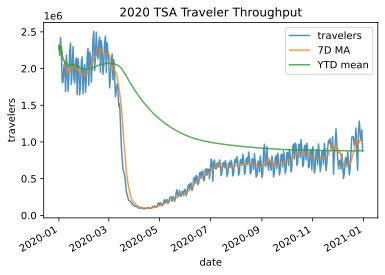

In [ ]:
_ = tsa_melted_holiday_travel.loc['2020'].assign(
    **{
        '7D MA': lambda x: x.rolling('7D').travelers.mean(),
        'YTD mean': lambda x: x.expanding().travelers.mean()
      }
).plot(title='2020 TSA Traveler Throughput', ylabel='travelers', alpha=0.8)

Outros tipos de janela:
- [movimento exponencialmente ponderado](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html): use o método `ewm()`
- [custom](https://pandas.pydata.org/docs/user_guide/window.html#window-custom-rolling-window): crie uma subclasse de `pandas.api.indexers.BaseIndexer` ou use a classe pré-contruída `pandas.api.indexers`

## Próxima seção: Data Visualization

Vamos tirar um tempo para alguns exercícios para checar o seu entendimento:

1. Leia os dados sobre meteoritos do dataset `Meteorite_Landings`.
2. Renomeie a coluna `mass (g)` para `mass`, e descarte todas as colunas de latitude e longitude.
3. Modifique a coluna `year` para apenas conter os anos, a converta para um tipo de dado numérico e crie uma nova coluna indicando se o ano é desconhecido. Dica: Use o comando `year.str.slice()` para pegar a substring.
4. Existe um erro na entrada de dados na coluna `year`. Você consegue achá-lo? (Não gaste muito tempo com isso)
5. Compare as estatísticas sumarizadas da coluna `mass` para os meteoritos que foram achados contra os que foram observados quando caíram.
6. Crie uma tabela pivotada que mostre tanto o número de meteoritos quanto o meteorito na posição 95 em relação ao percentual de massa para aqueles que foram achados contra os que foram observados caindo por ano a partir de 1990 até 2000 (inclusive).
7. Usando o dataset `taxis` do início dessa seção, faça a reamostragem dos dados para uma frequência horária baseada no tempo de desembarque. Calcule os valores totais de `trip_distance`, `fare_amount`, `tolls_amount` e  `tip_amount`, e depois ache as 5 horas com os maiores valores de gorjetas.

### Exercícios

##### 1. Leia os dados sobre meteoritos do dataset `Meteorite_Landings`:

In [3]:
# Url do Github para acessar o dataset: 
# https://raw.githubusercontent.com/stefmolin/pandas-workshop/main/data/Meteorite_Landings.csv
import pandas as pd

url = 'https://raw.githubusercontent.com/stefmolin/pandas-workshop/main/data/Meteorite_Landings.csv'
meteorite = pd.read_csv(url)
meteorite.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


##### 2. Renomeie a coluna `mass (g)` para `mass`, e descarte todas as colunas de latitude e longitude.

In [5]:
meteorite.rename(
    columns={
        'mass (g)': 'mass'
    },
    inplace=True
)

mask = meteorite.columns.str.contains('reclat$|reclong', regex=True)
columns_to_drop = meteorite.columns[mask]
columns_to_drop


meteorite = meteorite.drop(columns=columns_to_drop)
meteorite.head()

,name,id,nametype,recclass,mass,fall,year,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,"(-33.16667, -64.95)"


In [9]:
meteorite.dtypes

name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year            object
GeoLocation     object
dtype: object

##### 3. Modifique a coluna `year` para apenas conter os anos, a converta para um tipo de dado numérico e crie uma nova coluna indicando se o ano é desconhecido. Dica: Use o comando `year.str.slice()` para pegar a substring.

In [15]:
meteorite.year = meteorite.year.str.slice(6,10)
import numpy as np

meteorite = meteorite.assign(
known_year=lambda x: np.where(~x.year.isna(), True, False)
)
meteorite.head()

,name,id,nametype,recclass,mass,fall,year,GeoLocation,known_year
0,Aachen,1,Valid,L5,21.0,Fell,1880,"(50.775, 6.08333)",True
1,Aarhus,2,Valid,H6,720.0,Fell,1951,"(56.18333, 10.23333)",True
2,Abee,6,Valid,EH4,107000.0,Fell,1952,"(54.21667, -113.0)",True
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,"(16.88333, -99.9)",True
4,Achiras,370,Valid,L6,780.0,Fell,1902,"(-33.16667, -64.95)",True


##### 4. Existe um erro na entrada de dados na coluna `year`. Você consegue achá-lo?

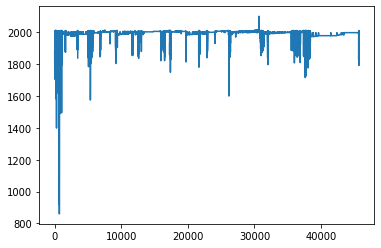

In [28]:
#years = meteorite.year.sort_values(ascending=True).astype(float)
years = meteorite.year.astype(float)
#meteorite.year.describe()
#meteorite.dtypes
import matplotlib.pyplot as plt
plt.plot(years)

In [51]:
years.sort_values(ascending=False)

30682    2101.0
194      2013.0
30730    2013.0
30763    2013.0
30774    2013.0
          ...  
38207       NaN
38231       NaN
38308       NaN
38335       NaN
45700       NaN
Name: year, Length: 45716, dtype: float64

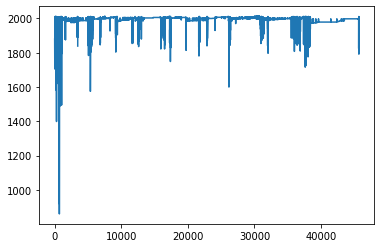

In [52]:
meteorite.loc[meteorite['year'] == 2010.0] = np.nan
plt.plot(meteorite.year.astype(float))

##### 5. Compare as estatísticas sumarizadas da coluna `mass` para os meteoritos que foram achados contra os que foram observados quando caindo.

In [54]:
meteorite[["mass", "fall"]].groupby("fall").describe()

mass                                                             \
         count          mean            std  min     25%     50%      75%   
fall                                                                        
Fell    1075.0  47070.715023  717067.125826  0.1  686.00  2800.0  10450.0   
Found  44510.0  12461.922983  571105.752311  0.0    6.94    30.5    178.0   

                   
              max  
fall               
Fell   23000000.0  
Found  60000000.0

##### 6. Crie uma tabela pivotada que mostre tanto o número de meteoritos quanto o 95º percentil em relação a massa para aqueles que foram achados contra os que foram observados quando caindo por ano a partir de 1990 até 2000 (inclusive).

In [91]:
meteor = meteorite.dropna().copy() # fazendo uma copia do dataframe, e retirando os nans
meteor.year = pd.to_numeric(meteor['year'], errors='coerce') # mudando o formato da coluna year
meteor = meteor.query("year >= 1990.0 and year <= 2000.0") # filtrando de acordo com o ano
meteor.head()

,name,id,nametype,recclass,mass,fall,year,GeoLocation,known_year
70,Ban Rong Du,4934.0,Valid,"Iron, ungrouped",16700.0,Fell,1993,"(16.66667, 101.18333)",True
83,Baszkówka,4957.0,Valid,L5,15500.0,Fell,1994,"(52.03333, 20.93583)",True
115,Bilanga,5045.0,Valid,Diogenite,25000.0,Fell,1999,"(12.45, -0.08333)",True
151,Burnwell,5175.0,Valid,H4-an,1504.0,Fell,1990,"(37.62194, -82.23722)",True
162,Campos Sales,5249.0,Valid,L5,23680.0,Fell,1991,"(-7.03333, -40.16667)",True


In [96]:

meteor.assign(
    percentil95=meteor.year.quantile(q=0.95, interpolation='linear')
).pivot_table(
    index='year', columns='fall', 
    values='percentil95', aggfunc='sum', 
    margins=True, margins_name='Total'
)

"""
meteor.assign(
    percentil95=lambda x: np.where(
        # mostrar o número de meteoritos
        # o 95º percentil em relação a massa para aqueles que foram achados contra os que foram observados quando caindo por ano
        # a partir de 1990 até 2000 (inclusive).
        x.year.quantile(q=0.95, interpolation='linear')
    )
).pivot_table(
    index='year', columns='fall', 
    values='percentil95', aggfunc='sum', 
    margins=True, margins_name='Total'
)"""

meteor.head()

,name,id,nametype,recclass,mass,fall,year,GeoLocation,known_year
70,Ban Rong Du,4934.0,Valid,"Iron, ungrouped",16700.0,Fell,1993,"(16.66667, 101.18333)",True
83,Baszkówka,4957.0,Valid,L5,15500.0,Fell,1994,"(52.03333, 20.93583)",True
115,Bilanga,5045.0,Valid,Diogenite,25000.0,Fell,1999,"(12.45, -0.08333)",True
151,Burnwell,5175.0,Valid,H4-an,1504.0,Fell,1990,"(37.62194, -82.23722)",True
162,Campos Sales,5249.0,Valid,L5,23680.0,Fell,1991,"(-7.03333, -40.16667)",True


##### 7. Usando o dataset `taxis` do início dessa seção, faça a reamostragem dos dados para uma frequência por hora baseada no tempo de desembarque. Calcule os valores totais de `trip_distance`, `fare_amount`, `tolls_amount` e  `tip_amount`, e depois ache as 5 horas com os maiores valores de gorjetas.

# Referências

Link do repositório original - Git: https://github.com/stefmolin/pandas-workshop

Notebook original - https://github.com/stefmolin/pandas-workshop/blob/main/notebooks/2-data_wrangling.ipynb